In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../Data/pharmacy_tx.csv")
df 

,tx_date,pharmacy,diagnosis,drug,bin,pcn,group,rejected,patient_pay
0,2022-01-02,Pharmacy #6,G99.93,branded tanoclolol,725700,1UQC,NaN,False,13.39
1,2022-01-02,Pharmacy #42,U60.52,branded oxasoted,664344,NaN,52H8KH0F83K,False,7.02
2,2022-01-02,Pharmacy #37,Q85.91,branded cupitelol,725700,1UQC,NaN,False,13.39
3,2022-01-02,Pharmacy #30,U60.52,generic oxasoted,571569,KB38N,6BYJBW,False,10.84
4,2022-01-02,Pharmacy #18,N55.01,branded mamate,664344,NaN,ZX2QUWR,False,47.00
...,...,...,...,...,...,...,...,...,...
13910239,2022-12-30,Pharmacy #42,U27.71,branded colifunene,322463,NaN,HO8HUGL,True,0.00
13910240,2022-12-30,Pharmacy #45,N59.44,generic tafistitrisin,664344,NaN,TFZOR5R49,False,6.28
13910241,2022-12-30,Pharmacy #54,W50.87,generic tanoclolol,691847,N098KI,6SP1DG,False,6.94
13910242,2022-12-30,Pharmacy #0,I68.27,branded prazinib,96934,S76J7V6,NaN,False,13.93


In [9]:
for header in df.columns:
    print(header, df[header].unique().shape)

tx_date (363,)
pharmacy (58,)
diagnosis (133,)
drug (114,)
bin (12,)
pcn (49,)
group (49,)
rejected (2,)
patient_pay (20437,)


In [4]:
for header in df.columns:
    print(header, df[header].isnull().sum())

tx_date 0
pharmacy 0
diagnosis 0
drug 0
bin 0
pcn 3626961
group 3909025
rejected 0
patient_pay 0


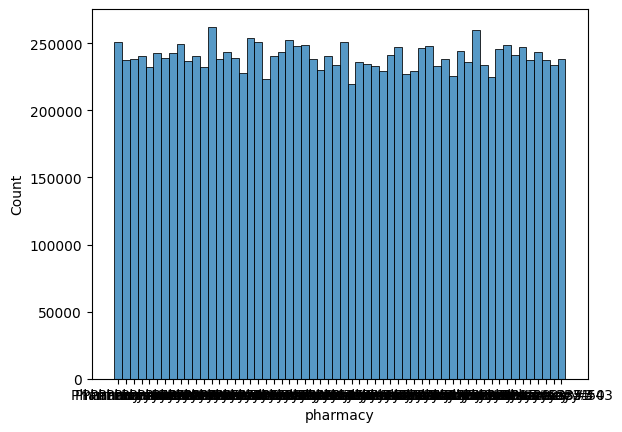

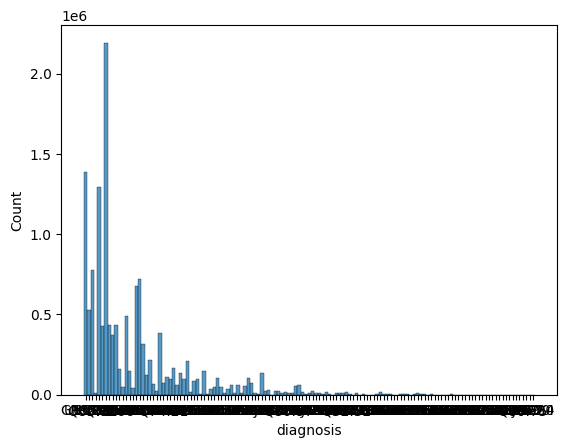

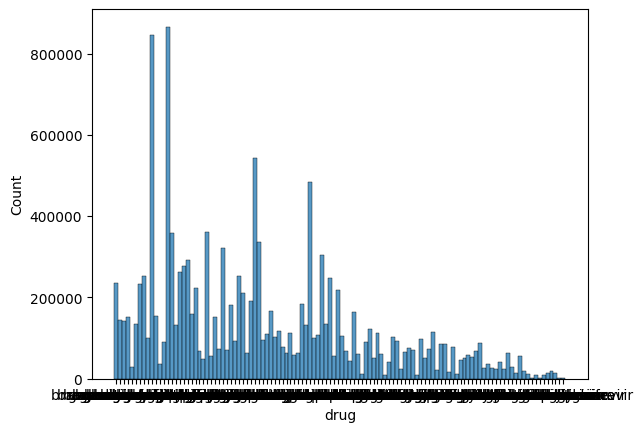

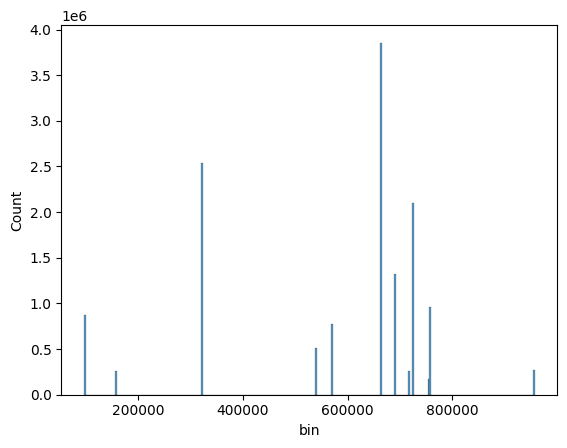

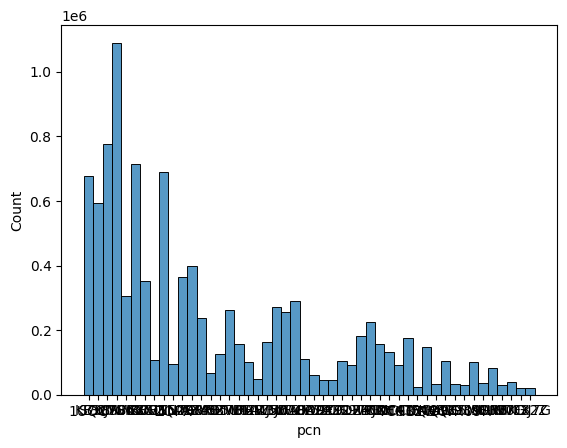

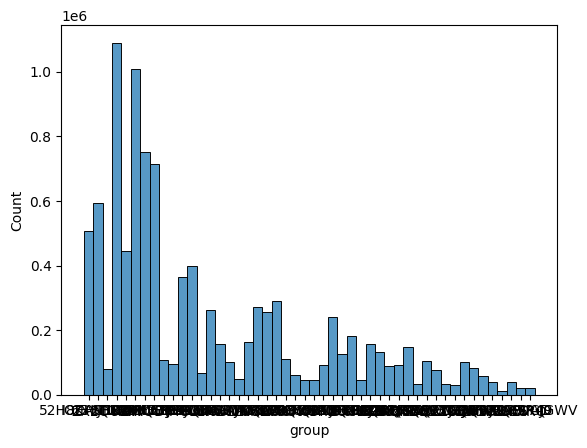

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


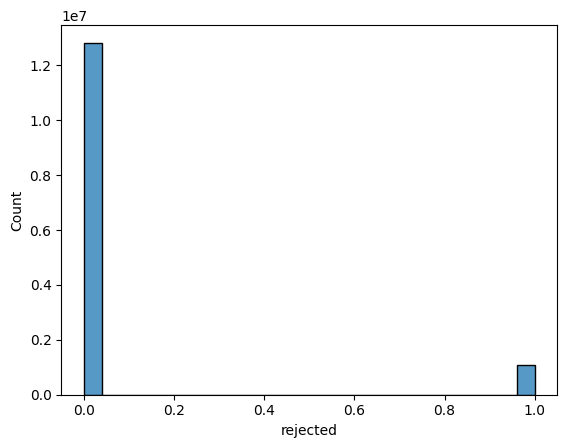

In [6]:
# Generate code to give histogram of each column of df except for the first column and last column

for header in df.columns[1:-1]:
    sns.histplot(df[header])
    plt.show()

In [ ]:
# Getting the statistics for each column of df except for the first column 

for header in df.columns[1:]:
    print(header, df[header].describe())



count         13910244
unique              58
top       Pharmacy #24
freq            262313
Name: pharmacy, dtype: object
count     13910244
unique         133
top         I68.27
freq       2193157
Name: diagnosis, dtype: object
count             13910244
unique                 114
top       generic prazinib
freq                865905
Name: drug, dtype: object
count    1.391024e+07
mean     5.732278e+05
std      2.052600e+05
min      9.693400e+04
25%      3.224630e+05
50%      6.643440e+05
75%      7.257000e+05
max      9.569710e+05
Name: bin, dtype: float64
count     10283283
unique          48
top         327CKV
freq       1090515
Name: pcn, dtype: object
count         10001219
unique              48
top       IOEAN1DWVV3Y
freq           1090515
Name: group, dtype: object
count     13910244
unique           2
top          False
freq      12823384
Name: rejected, dtype: object
count    1.391024e+07
mean     2.406044e+01
std      3.952487e+01
min      0.000000e+00
25%      8.850000e+00

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


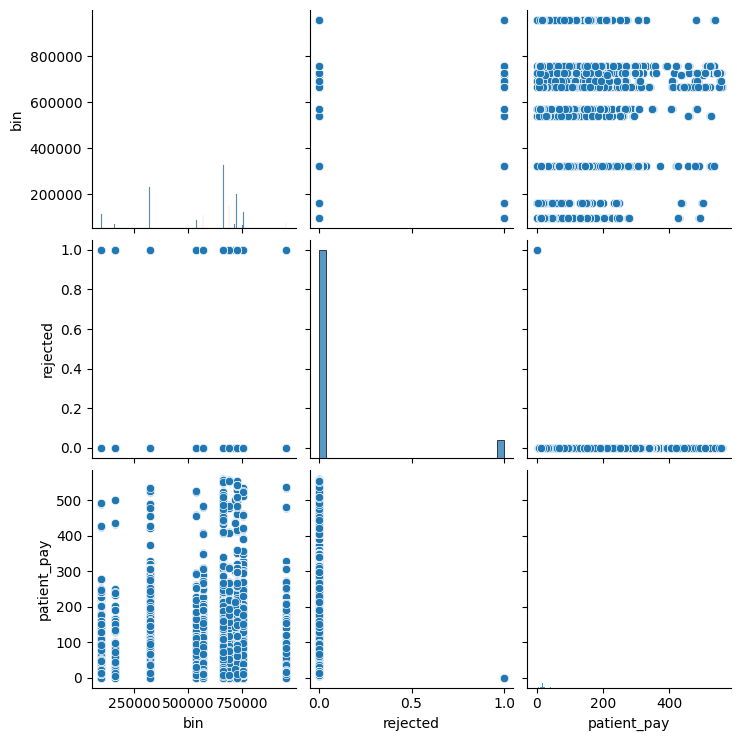

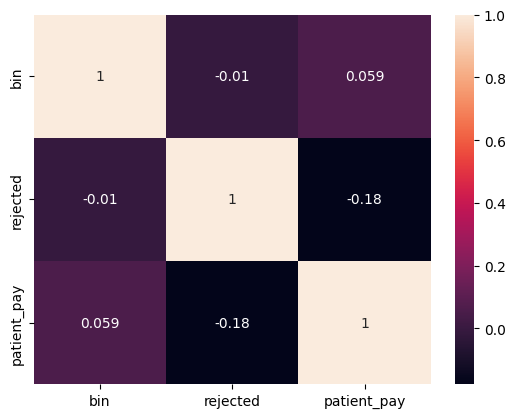

In [10]:
# Plotting pairplot of df except for the first column

sns.pairplot(df.iloc[:,1:])
plt.show()

# Plotting heatmap of df except for the first column

sns.heatmap(df.iloc[:,1:].corr(), annot=True)
plt.show()

In [14]:
# Counting number of non zero patient_pay entries of corresponding rows where rejected is True

df[df['rejected']==True]['patient_pay'].astype(bool).sum(axis=0)


0

In [17]:
# Printing the rows where rejected is True and patient_pay is zero

df[(df['rejected']==True) & (df['patient_pay']==0)]

,tx_date,pharmacy,diagnosis,drug,bin,pcn,group,rejected,patient_pay
12,2022-01-02,Pharmacy #25,M42.24,branded gentipapavir,725700,327CKV,IOEAN1DWVV3Y,True,0.0
34,2022-01-02,Pharmacy #4,I38.43,branded sorine,322463,3Y5ZW0,NaN,True,0.0
43,2022-01-02,Pharmacy #0,I68.27,branded mule,160389,RB7UU,RS5RB3YA,True,0.0
58,2022-01-02,Pharmacy #44,H60.83,branded glycogane,664344,YFVIA,AJK5MZ25T9IA,True,0.0
76,2022-01-02,Pharmacy #32,H36.57,branded semufolic,664344,NaN,52H8KH0F83K,True,0.0
...,...,...,...,...,...,...,...,...,...
13910191,2022-12-30,Pharmacy #24,B45.03,branded todiadianic,664344,YFVIA,AJK5MZ25T9IA,True,0.0
13910197,2022-12-30,Pharmacy #37,I68.27,branded hidizuzunib,322463,393U,XY5GQQ9,True,0.0
13910205,2022-12-30,Pharmacy #31,B45.03,branded todiadianic,725700,327CKV,IOEAN1DWVV3Y,True,0.0
13910225,2022-12-30,Pharmacy #29,K87.68,branded cuxirin,664344,NaN,52H8KH0F83K,True,0.0


bin 664344    3855462
322463    2542376
725700    2100642
691847    1323776
757349     959441
96934      870740
571569     774925
539437     516933
956971     272906
160389     261912
718350     256611
756120     174520
Name: bin, dtype: int64


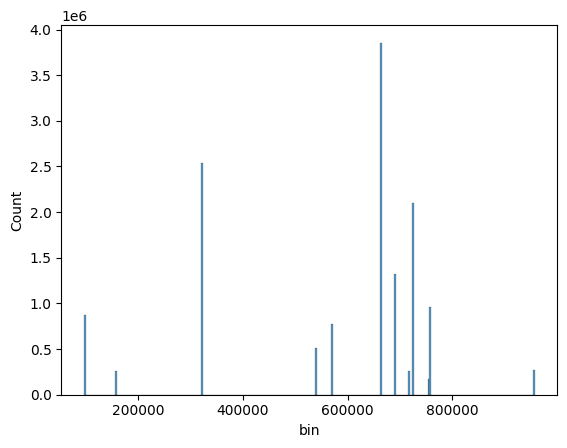

pcn 327CKV     1090515
S76J7V6     777502
MSCXSG      713743
3O71UTS     690356
1UQC        676984
KB38N       594959
N098KI      400190
T52GV       364750
NC7EN       351568
CS8580      305315
YFVIA       291860
WM6A        272906
RB7UU       261912
J5DT8       256611
DY4B        238438
TPJD        226317
T17LNK      182746
7THOQ5      174520
TAZ5W       161867
RM0HB       157326
REGLCC      156307
IF448       147338
YICC41      132469
3Y5ZW0      126536
W1LW9Y      111090
KBOSN       108027
6ZGS97C     105167
2TIC        103804
BIZF        101105
9C5MOR3     100203
ZQPX         96356
9D24         93238
XH4T3        92847
9FU70        83021
AZUO5U       68067
OO0E         60095
RAM3J        47895
P4LC         46208
BZ22Z2       46125
W7L3         40076
YL5CMT       34869
NG4CS        33271
MQWH09H      33252
ULM7G        30128
393U         28893
CG3ZWQ       25218
K5KDJ7G      21030
FX2Z         20263
Name: pcn, dtype: int64


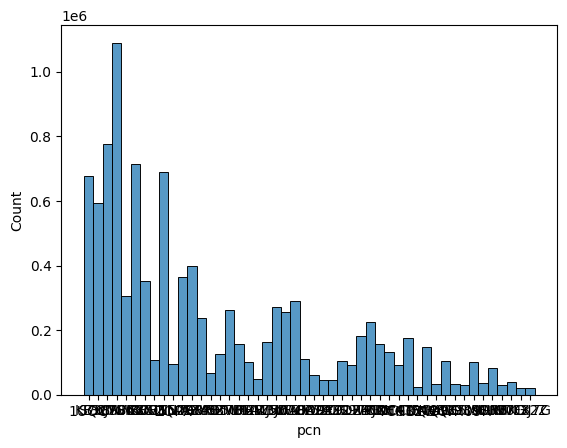

group IOEAN1DWVV3Y     1090515
HO8HUGL          1010441
STGRDKR1J5RD      753156
DGLGRYP           713743
6BYJBW            594959
52H8KH0F83K       507920
1CAHL             443820
6SP1DG            400190
EVD4X5            364750
AJK5MZ25T9IA      291860
L9QZA             272906
RS5RB3YA          261912
IX6P0             256611
YY6B1J4E8KJ3      241607
Z01MLD4I          182746
T51T6V2E8L        161867
SJVO3GXUURRGO     157326
BH2Q8B3GY2GAV     156307
FZPLF4O6FD        147338
MP3IQ             132469
DYGBI610ZY        126720
0OGKQ             111090
I4UYEP84W3        107321
XK8RM5E75ZW       103804
QK6BI1N61         101105
S2QKZ0OFNWS6X     100203
KZWQDIHCLLHD1      96356
VC81HUO7ZD         93238
GOM8K0             92847
9R3Z3QKDF3         88372
U19J4RVCA          83021
ZX2QUWR            79042
0TZ9XYJZJH         75782
IGN6JL34H37D       68067
HPVSQW7M8          60095
RGVK1              56637
7DUPMODV0          47895
7LL04USF           46678
O19XSLDEFB         46208
ZOYKF0N5NEO        

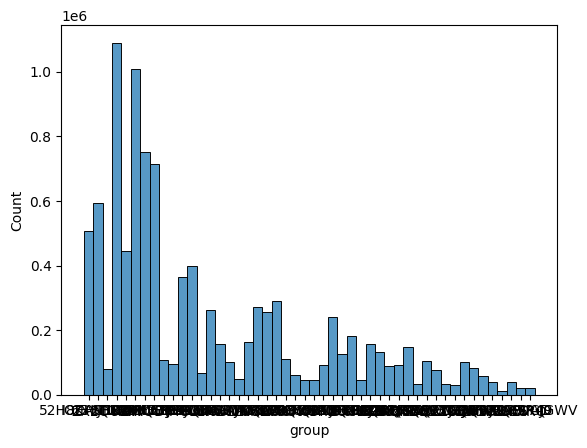

In [18]:
# Getting the distributions of bin, pcn, and group columns in df and plotting them

for header in ['bin', 'pcn', 'group']:
    print(header, df[header].value_counts())
    sns.histplot(df[header])
    plt.show()

In [13]:
df_one_hot = pd.get_dummies(df, columns = df.columns[3:5])
df_one_hot


,tx_date,pharmacy,diagnosis,pcn,group,rejected,patient_pay,drug_branded antimab,drug_branded bovirol,drug_branded brede,...,bin_322463,bin_539437,bin_571569,bin_664344,bin_691847,bin_718350,bin_725700,bin_756120,bin_757349,bin_956971
0,2022-01-02,Pharmacy #6,G99.93,1UQC,NaN,False,13.39,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2022-01-02,Pharmacy #42,U60.52,NaN,52H8KH0F83K,False,7.02,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2022-01-02,Pharmacy #37,Q85.91,1UQC,NaN,False,13.39,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,2022-01-02,Pharmacy #30,U60.52,KB38N,6BYJBW,False,10.84,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2022-01-02,Pharmacy #18,N55.01,NaN,ZX2QUWR,False,47.00,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13910239,2022-12-30,Pharmacy #42,U27.71,NaN,HO8HUGL,True,0.00,0,0,0,...,1,0,0,0,0,0,0,0,0,0
13910240,2022-12-30,Pharmacy #45,N59.44,NaN,TFZOR5R49,False,6.28,0,0,0,...,0,0,0,1,0,0,0,0,0,0
13910241,2022-12-30,Pharmacy #54,W50.87,N098KI,6SP1DG,False,6.94,0,0,0,...,0,0,0,0,1,0,0,0,0,0
13910242,2022-12-30,Pharmacy #0,I68.27,S76J7V6,NaN,False,13.93,0,0,0,...,0,0,0,0,0,0,0,0,0,0
